<a href="https://colab.research.google.com/github/olive-su/AI_codepresso/blob/master/%EC%A0%81%EC%B8%B5_LSTM%2BEmbedding_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_IMDB_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98_%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 적층 LSTM 모델을 이용한 영화리뷰 분류 분석

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import imdb

### Step 1-1. Input tensor 와 Target tensor 준비(훈련데이터)
* IMDB 영화 리뷰 데이터 down

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

### Step 1-2. 입력 데이터의 전처리 
* LSTM 모델에 데이터를 입력하기 위해 시퀀스 데이터의 길이를 통일

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)

In [ ]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

### Step2. 적층 LSTM 모델 디자인

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()

In [ ]:
# embedding layer: 32차원
# hidden layer : LSTM 2개[32, 16]
# dropout rate : 0.5
# output layer
model.add(layers.Embedding(input_dim=10000,
                           output_dim=32,
                           input_length=800))
model.add(layers.LSTM(units=32, return_sequences=True))
model.add(layers.GRU(units=16))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 800, 32)           320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 800, 32)           8320      
_________________________________________________________________
gru (GRU)                    (None, 16)                2400      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 330,737
Trainable params: 330,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# loss : binary crossentropy/ optimizer : rmsprop/ metric : accuracy
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# batch size : 128, epochs : 10, validation data set percent : 20%
# batch size : 128, epochs : 10, validation data set percent : 20%
history = model.fit(
    x=input_train, y=y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 18s 73ms/step - loss: 0.5147 - accuracy: 0.7413 - val_loss: 0.3424 - val_accuracy: 0.8612
Epoch 2/10
157/157 [==============================] - 11s 70ms/step - loss: 0.2969 - accuracy: 0.8876 - val_loss: 0.5258 - val_accuracy: 0.8078
Epoch 3/10
157/157 [==============================] - 11s 70ms/step - loss: 0.2414 - accuracy: 0.9148 - val_loss: 0.7521 - val_accuracy: 0.7280
Epoch 4/10
157/157 [==============================] - 11s 70ms/step - loss: 0.2028 - accuracy: 0.9277 - val_loss: 0.3740 - val_accuracy: 0.8536
Epoch 5/10
157/157 [==============================] - 11s 72ms/step - loss: 0.1732 - accuracy: 0.9380 - val_loss: 0.3131 - val_accuracy: 0.8870
Epoch 6/10
157/157 [==============================] - 11s 71ms/step - loss: 0.1681 - accuracy: 0.9464 - val_loss: 0.3077 - val_accuracy: 0.8880
Epoch 7/10
157/157 [==============================] - 11s 70ms/step - loss: 0.1387 - accuracy: 0.9556 - val_loss: 0.3364 - val_accuracy:

In [ ]:
# 학습과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

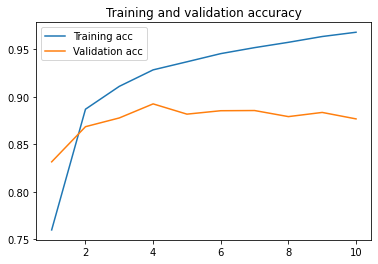

In [ ]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

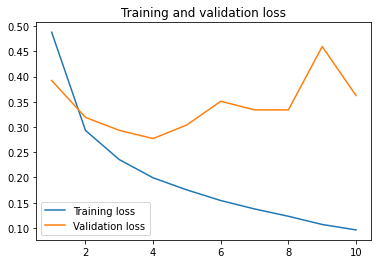

In [ ]:
# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 테스트 데이터 셋을 통한 성능 측정
loss, acc = model.evaluate(x=input_test, y = y_test)

782/782 [==============================] - 18s 23ms/step - loss: 0.4905 - accuracy: 0.8666
